# Nanodegree Engenheiro de Machine Learning
## Modelp de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **aberrante** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado.

In [20]:
# Importar as bibliotecas necessárias para este projeto
from __future__ import print_function
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print ("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [73]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print ("Estatísticas para os dados dos imóveis de Boston:\n")
print ("Preço mínimo: ${:,.2f}".format(minimum_price))
print ("Preço máximo: ${:,.2f}".format(maximum_price))
print ("Preço médio: ${:,.2f}".format(mean_price))
print ("Preço mediano: ${:,.2f}".format(median_price))
print ("Desvio padrão dos preços: ${:,.2f}".format(std_price))


Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: 'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

_Utilizando sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um **aumento** no valor do `'MEDV'` ou uma **diminuição** do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções._  
**Dica:** Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?

**Resposta: **

RM:
Quanto maior a quantidade de quartos de uma casa, maior o padrão financeiro do morador e da região que contém essas casas. Também quanto mais quartos mais área e portanto maior preço do imóvel também. Então para maiores RM podemores ter maiores valores de MEDV.

LSTAT:
Quanto maior a porcentagem de proprietários de classe baixa, menos vai valer um imóvel na região pois é esperado que pessoas da classe baixa comprem imóveis mais baratos. Então um aumento do LSTAT deverá levar a uma diminuição do valor de MEDV.

PTRATIO:
Razao de estudantes por professor: N° Estudantes/N° de Professores. Quanto maior esse número mais estudantes por professor. Essa metrica quanto maior for pode indicar que as escolas não serão boas por que tem muitos alunos por cada professor, então a aula pode ter qualidade menor e os pais preferem escolas e regiões onde tem mais professores que alunos relativamente. Então um aumento de PTRATIO pode ocasionar uma diminuição do valor de MEDV.


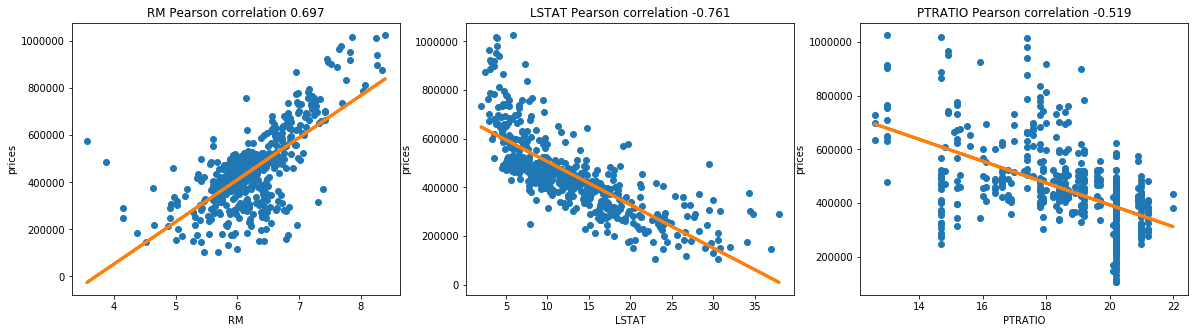

In [74]:
# For the sake of completion, after initial review, I insert here a valuable
#  suggestion from reviewer, the plots of features x prices:

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    fit = np.polyfit(data[col], prices, 1)
    plt.plot(data[col], data[col] * fit[0] + fit[1], lw=3)
    plt.title(col + ' Pearson correlation ' + str(np.round(np.corrcoef(data[col], prices)[1][0], 3)))
    plt.xlabel(col)
    plt.ylabel('prices')

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente da determinação para um modelo é uma estatística útil em análise regressa, como se ele frequentemente descrevesse como "good" a capacidade do modelo de fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo, ao utilizar esse modelo, ele pode ser explicado pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [24]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?* 

Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo.

In [25]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


**Resposta:**
Os valores de score R2 tem alcance entre 0 e 1, sendo um o valor máximo que indica que a estimatidor de regressão se ajusta perfeitamente ao dados. Como o valor calculado é 0.923, muito próximo de 1, então essa modelo captura a variação do alvo com sucesso.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste.
  - Dividq os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [28]:
# TODO: Importar 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Êxito
print ("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
*Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?*  
**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta: **
Ao dividir em subconjuntos de teste e treinamento podemos fazer uma validação cruzada antes de aplicar o modelos com os dados reais (ou alvo). Dessa meneira podemos avaliar e analisar a estimação e ao mesmo tempo testar diversos métodos (algoritmos de estimação como regressão ou SVM, e diferentes parâmetros dos mesmos) e verificar qual modela melhor nossos dados para aumentar a chance de acertos com os dados reais.

Caso não realizemos testes no modelo pode ocorrer overfit, ou seja, o modelo ser muito adaptado ao treinamento e não ter boa performance com os dados reais.

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.

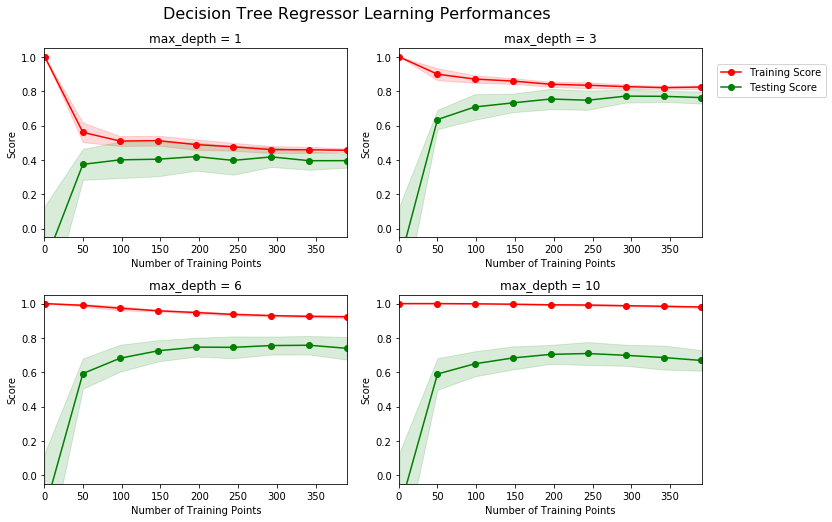

In [29]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
*Escolha um dos gráficos acima e determine a profundidade máxima para o modelo. O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste? Ter mais pontos de treinamento beneficia o modelo?*  
**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular?

**Resposta: **

Para a curva de max_depth = 3, temos um valor alto de test_score (próximo de 0.7) e um valor alto e aceitável de training_score(sem overfit). Ambos valores estão convergidos desde 200 amostras (bem razoável considerando que temos perto de 500 amostras) e como a profundidade é 3, o custo computacional é menor e já temos essa quantidade de amostras na base de treinamento. Se mais pontos de treinamento são adicionados há um pequeno aumento do test score, mas não há uma grande melhoria então não há uma grande necessidade de mais pontos.

Neste caso as curvas convergem para o score de aproximadamente 0.7.

Considerando agora o comportamento desde o inicio dos gráficos, podemos ver as seguintes situações:

-Próximo de zero pontos de treinamento:
Score de treinamento é alto, pois é fácil de ajustar poucas amostras no modelo. Por outro lado como o modelo está muito ajustado a essas poucas amostras de treinamento então as amostras de cross-validation vão dar valores errados.

-Com 50 pontos de treinamento
Neste caso o score de treinamento diminui com mais amostras, isso indica que ele não está mais em overfit. E como o modelo fica melhor com os dados  de treinamento já começa a acertar bastante (aumentando o Testing score) indicando que estamos provavelmente no caminho certo.

-Com 100 pontos de treinamento 
O Training score diminui um pouco deixando para trás tendências de overfit e Testing score aumenta confirmando esse max_depth como uma boa escolha. As curvas de score começam a convergir adequadamente, como esperado num bom modelo.

-200 pontos ou mais
Confirmação de modelo adequando como explicado no início do texto.


### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir.

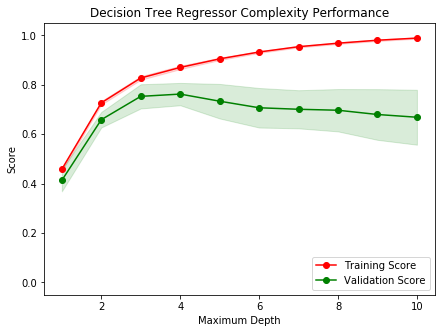

In [30]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
*Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)? E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?*  
**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta?

**Resposta: **

Para R=1 temos score baixo de treinamento e cross-validation então erros altos tanto de treinamento quanto de validação. Os dados de treinamento não se encaixam na Decision Tree de grau 1, isso é o "underfit". Então neste caso:
    Viés (bias) Alto pois temos muitos erros de treinamento.

Para R=10 o modelo tem overfit pois acerta muito para os dados de treinamento (próximo de 1 no gráfico) e apresenta tendência de aumento de erros de teste (vai deminuindo o validation R2_score). Então neste caso:
    Alta Variancia: poucos erros de treinamento e muitos erros de cross-validation


### Questão 6 - Modelo Ótimo de Melhor Suposição
*Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido? Que intuição te levou a essa resposta?*

**Resposta: **

R=4. Pois os dados de validação cruzada (teste) estão próximo do score máximo e o treinamento está sem overfit.

Também pela análise do comportamento típico da curva de complexidade que diverge para profundidades grandes e tem muitos erros (cross-validation e treinamento no começo), esse ponto é o que indica que a profundidade é ok.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
*O que é a técnica de busca em matriz (*grid search*) e como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?*

**Resposta: **
Busca em matriz é uma técnica bastante poderosa utilizada para testar diversos parâmetros de um algoritimo de aprendizagem e calcular cada respectivo score. GridSearch realiza uma busca exaustiva nos parâmetros específicos do estimador. Assim podemos saber qual combinação de parâmetros é a melhor para o fitting dos dados de teste.
Neste caso de Decision Tree Regressor, o parâmetro testado é o max_depth que vai variar de 1 a 10.

### Questão 8 - Validação Cruzada
*O que é a técnica de treinamento de validação-cruzada k-fold? Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?*  
**Dica:** Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada?

**Resposta: **
Essa técnica realiza uma divisão de k-dobras (k-fold) no conjunto de treinamento, em treinamento e cross-validation e realiza permutações entre esses cunjuntos para que se aumente a generalização do modelo. 

Neste caso como test_size = 0.20, estamos dividindo em 5 partes.
k = 5
Em cada uma das 10 iterações que vamos fazer utilizamos 4 partes para treinamento e uma parte para validação.
A divisão das amostras para o fold de treinamento ou validação é feita randomicamente pela função SuffleSplit.

O score final é obtido pela média dos scores intermediários.

A variância diminui a medida que k aumenta pois o estimador (algoritmo de aprendizagem) vai ter maior variação no treinamento e gerar diferentes resultados. Desses resultados vai ser calculada a média que representa um valor mais generalizado.

Se utilizarmos apenas uma divisão entre treinamento e validação pode haver grande variância, pois o resultado vai depender muito das amostras que forem separadas entre treinamento/validação e a avaliação vai depender muito de como essa divisão for feita.

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [66]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
_Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo.

In [75]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print ("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

O parâmetro 'max_depth' é 4 para o modelo ótimo.


**Resposta: **
A profundidade maxima (max_depth) do modelo ótimo para o DecisionTreeRegressor neste caso é 4.

Esse resultado é o mesmo obtido em nossa previsão na questão 6.

Isso indica que nossa previsão foi correta.

### Questão 10 -Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de quartos em um imóvel | 5 quartos | 4 quartos | 8 quartos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
*Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas? Esses preços parecem razoáveis dados os valores para cada atributo?*  
**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta.  

Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.

In [80]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print ("Preço estimado para a casa do cliente {}: ${:,.2f}\n".format(i+1, price))

print("Let´s also take a look at features description: ")
print(features.describe())

Preço estimado para a casa do cliente 1: $403,025.00

Preço estimado para a casa do cliente 2: $237,478.72

Preço estimado para a casa do cliente 3: $931,636.36

Let´s take a look at features description: 
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


**Resposta: **

Resultados da estimação para os 3 clientes:

Preço estimado para a casa do cliente 1: $403,025.00
Preço estimado para a casa do cliente 2: $237,478.72
Preço estimado para a casa do cliente 3: $931,636.36

Saida da exploração de dados:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13

Comparando as features de cada cliente (RM, LSTAT, PTRATIO) com seus valores em features describe:

-Cliente 1: (8, 3, 12)
RM, próximo do valor máximo, LSTAT bem abaixo da média e PTRATIO perto do mínimo. Essa sem dúvida é uma casa de alto padrão. Essa casa está dentro dos limites dos nossos dados, nosso modelo deve aplicar bem. O preço alocado para ela é próximo do máximo de previsão do modelo, o que é adequado.

-Cliente 2:(4, 32, 33)
RM próximo do mínimo, LSTAT próximo do máximo e PTRATIO perto do mínimo. Essa é uma casa de baixo padrão e preço. Nosso modelo está obtendo valores muito bons uma vez que colocou preço próximo do mínimo ($105,000.00) para esta casa.

-Cliente 3: (5, 17, 15):
RM no primeiro quartil, LSTAT no quarto quartil, e PTRATIO no primeiro quartil. Essa casa tem característica de menor padrão mas tem um índice muito bom, o PTRATIO. Isso faz com que apesar de as duas primeiras features terem valor de baixo padrão, a terceira feature tem valor relativamente alto e traz o valor estimado da residência para próximo da média/mediana. Isso indica que nosso modelo está correto prevendo valores com ponderação adequada para variações relativas das features.

Comparando os dados estimados com a exploração vemos que os resultados foram muito razoáveis pois estão dentro dos valores máximo e mínimo e dando predições adequadas conforme analisamos acima.


### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado. Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.

In [81]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
*Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.*  
**Dica:** Algumas questões para responder:
- *Quão relevante dados coletados em 1978 podem ser nos dias de hoje?*
- *Os atributos presentes são suficientes para descrever um imóvel?*
- *Esse modelo é robusto o suficiente para fazer estimativas consistentes?*
- *Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?*

**Resposta: **

O modelo construido oferece um resultado bem razoável.

Entretanto poderiam haver mais Features de imóveis para que os valores estimados fossem mais fiéis a realidade, pois apenas 3 parâmetros para uma situação complexa como de imóveis pode não ser suficiente.

Complementação:

Quão relevante dados coletados em 1978 podem ser nos dias de hoje?
-Esses dados podem ter mudado bastante até hoje. A vizinhança pode ter mudado bastante em termos de renda e nivel escolar. O dado de quantidade de dormitórios é relevante até hoje, a não ser que as casas sofreram muitas reformas.

Os atributos presentes são suficientes para descrever um imóvel?
-Não são. Como mencionado anteriormente escolha de imóvel é uma questão complexa onde inúmeras outras variáveis poderiam enriquecer o modelo, como proximidade de supermercados ou índices de assaltos.

Esse modelo é robusto o suficiente para fazer estimativas consistentes?
-De acordo com PredictTrials, houve relativa baixa variação dos valores estimados (Range in prices: $69,044.61). A diferença entre esses valores é em decorrencia do fator RANDOM da função split_test_train. Isso mostra que variando a escolha de amostras (randomização) entre train/test ocorreu pouca variação no resultado. Então considero que esse modelo é robusto o suficiente.

Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?
-Acredito que não pois outras váriáveis seriam mais importantes, como área do terreno total, proximidade de escolas, etc.